In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use("dark_background")
plt.rc("grid", alpha=0.3,color='gray', linestyle='-', linewidth=0.5)
plt.rc('axes', grid=True)


In [3]:
table = pd.read_csv(os.path.join("..", "fight_counter", "data","challenge_xp_raw.csv"))


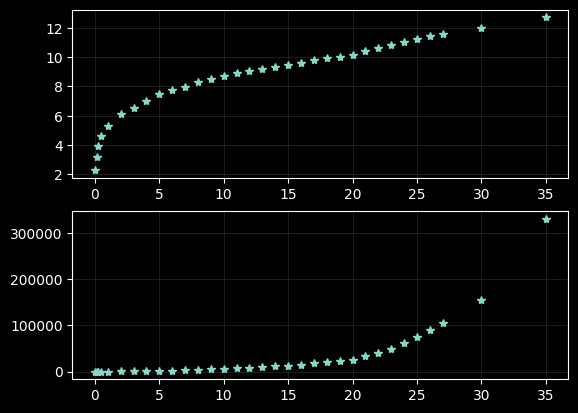

In [4]:
fig, axs = plt.subplots(2,1)
axs[0].plot(table["challenge"], np.log(table["xp"]), "*")
axs[1].plot(table["challenge"], table["xp"], "*")

In [5]:
cleaner = (table["challenge"] > 10) & table["xp"].notna()
X = table["challenge"][cleaner].to_numpy()
Y = table["xp"][cleaner].to_numpy()

In [6]:
print(X.shape)
print(Y.shape)
print(np.log(Y).shape)


(19,)
(19,)
(19,)


In [7]:

A = np.vstack([X, np.ones(len(X))]).T
a, b = np.linalg.lstsq(A, np.log(Y), rcond=None)[0]

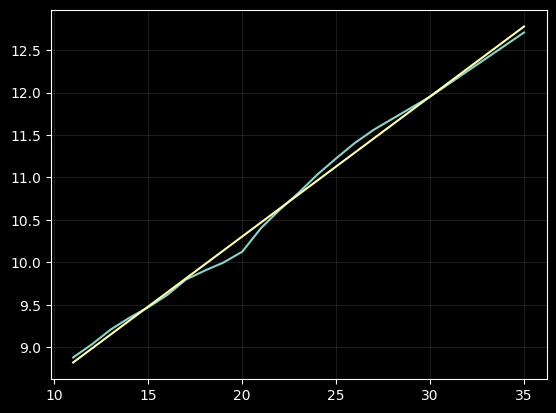

In [8]:
plt.plot(X, np.log(Y))
plt.plot(X, a* X + b)

In [9]:
empty_X = table["challenge"][table["xp"].isna()].to_numpy()

In [10]:
empty_Y = np.exp(a * empty_X + b)

In [11]:
rounded_Y = empty_Y.round(-3)


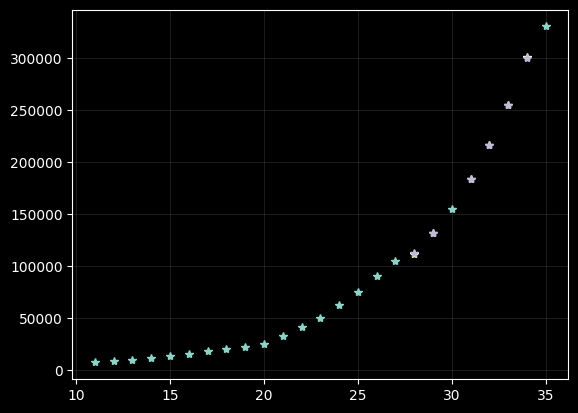

In [12]:
plt.plot(X, Y, "*")
plt.plot(empty_X, empty_Y, "*")
plt.plot(empty_X, rounded_Y, "*")

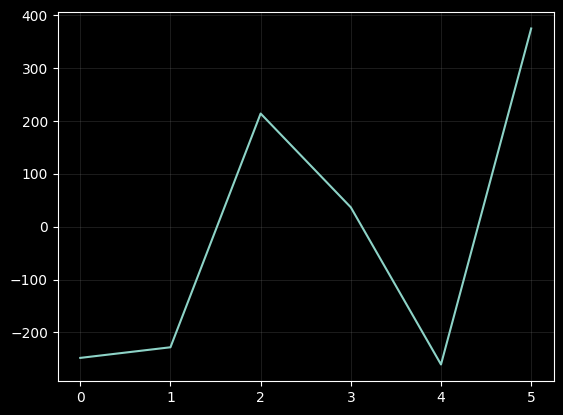

In [13]:
plt.plot(empty_Y-rounded_Y)

In [14]:

for x, y in zip(empty_X, rounded_Y):
    table.loc[table["challenge"] == x, "xp"] = y


In [22]:
table["xp"] = table["xp"].astype(int)

In [23]:
table.to_csv(os.path.join("..", "fight_counter","data", "challenge_xp_full.csv"), index=False)